In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
noise_ceiling_meg = []
noise_ceiling_meg_time = []
subjects = np.arange(1,28)
for eachsub in subjects:
    ceiling_voxcorrs = np.load('predictions_results_meg/subject_'+str(eachsub)+'_kernel_ridge.npy')
    print(np.max(ceiling_voxcorrs))
    noise_ceiling_meg_time.append(ceiling_voxcorrs)
    significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)>0.01)[0]
    #print(np.mean(model_voxcorrs[significant_indices]),np.mean(ceiling_voxcorrs[significant_indices]))
    noise_ceiling_meg.append(np.mean(np.nan_to_num(ceiling_voxcorrs[significant_indices])))
print(noise_ceiling_meg)

0.028608629727718264
0.02763856296946346
0.04129124522827218
0.03482876914994007
0.024428317434740658
0.022384535545661804
0.02524039110045654
0.03505422216338525
0.02318531707403601
0.016907987353169823
0.02430571662037875
0.048441468418422964
0.07600820388911589
0.02444099644091488
0.019982561267761156
0.026679489152191205
0.03665618169792116
0.02270239893127505
0.04453486932934736
0.02493098385272733
0.023178355803736207
0.021531179049774783
0.03042465410221568
0.019919073714323013
0.034718184143794684
0.05361707709345182
0.018032587980218444
[0.014285159291058181, 0.012597726520056338, 0.014817571525495878, 0.014037338958488304, 0.012352832432268953, 0.012617787615673014, 0.013005709492240449, 0.0131234941464906, 0.012270033420548653, 0.011670578252455472, 0.012635072152581297, 0.01782462313680202, 0.0213080564482852, 0.012912705682830773, 0.011965096373642342, 0.012429123803861877, 0.01484521043573379, 0.012335722575207937, 0.01686334623607805, 0.01226489419812249, 0.0122082982612

In [113]:
import plotly.graph_objects as go
from scipy import stats
import plotly
for i in np.arange(1):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=np.arange(1,28), y=np.array(noise_ceiling_meg), name='',
                             line=dict(color='blue', width=3.5),mode='lines+markers', error_y = dict(
                type ='data',
                #array = stats.sem(noise_ceiling_meg, axis=0, ddof=0),
                                 thickness=2,width=3,
                visible = True)
        ))

    # Edit the layout
    fig.update_layout(xaxis_title='Subjects',
                       yaxis_title='Average Pearson Correlation', width=750,height=500, font=dict(
            size=23,
            color='#000000'
        )
    ,title={
            #'text': "Error vs number of objects in the vocabulary",
             'text': 'Estimated Noise Ceiling',
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)', showlegend=False, legend=dict(
        yanchor="top",
        y=1.35,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=23,
            )
    ),
                      margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=30  #top margin
        )

                     )
    #np.max(rois_corr[:,0:7,i])+0.02]
    fig.update_yaxes(range=[0.01,0.022], gridwidth=0.01, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes( gridwidth=2, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    #fig.update_xaxes(ticklen=23, ticks="outside")
    fig.update_xaxes(tickvals=np.arange(1,28))

    #fig.write_image("csl_finetuned_bert.png")
    plotly.io.write_image(fig, 'Noise_Ceiling_Subjects.pdf', format='pdf')
    #plotly.io.write_image(fig, 'Encoder_Layerwise_Normalized_Predictiviy.jpg', format='jpg')
    #plotly.image.save_as(fig, 'Encoder_Models.png')
    fig.show()
    #break

In [119]:
noise_ceiling_meg_time = np.array(noise_ceiling_meg_time)

In [120]:
noise_ceiling_meg_time = np.reshape(noise_ceiling_meg_time,(24,208,81))

ValueError: cannot reshape array of size 454896 into shape (24,208,81)

In [121]:
noise_ceiling_meg_time.shape

(27, 16848)

In [117]:
finalcorr = []
for i in np.arange(24):
    temp = noise_ceiling_meg_time[i]
    temp = temp.T
    time_corr = []
    for j in np.arange(81):
        time_corr.append(np.mean(temp[j][np.where(temp[j])[0]]))
    finalcorr.append(time_corr)

IndexError: invalid index to scalar variable.

In [108]:
finalcorr = np.nan_to_num(finalcorr)

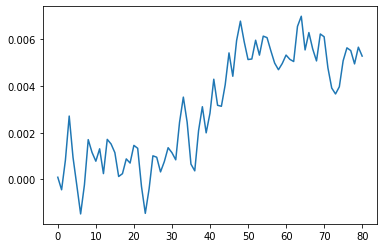

In [110]:
plt.plot(finalcorr[0])

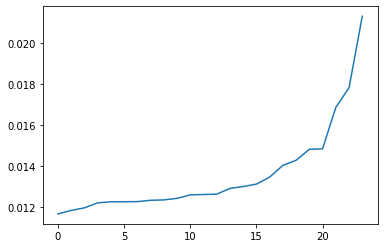

In [111]:
plt.plot(sorted(np.array(noise_ceiling_meg)))

In [30]:
noise_ceiling_meg_phoneme = []
noise_ceiling_meg_time_phoneme = []
subjects = np.arange(1,28)
for eachsub in subjects:
    ceiling_voxcorrs = np.load('predictions_results_meg_phoneme/subject_'+str(eachsub)+'_kernel_ridge.npy')
    print(np.max(ceiling_voxcorrs))
    noise_ceiling_meg_time_phoneme.append(ceiling_voxcorrs)
    significant_indices = np.where(np.nan_to_num(ceiling_voxcorrs)>0.009)[0]
    #print(np.mean(model_voxcorrs[significant_indices]),np.mean(ceiling_voxcorrs[significant_indices]))
    noise_ceiling_meg_phoneme.append(np.mean(np.nan_to_num(ceiling_voxcorrs[significant_indices])))
print(noise_ceiling_meg_phoneme)

0.012112511979197675
0.012377123147373787
0.018111398335370236
0.014072443530783412
0.011891479083976853
0.011966175199608442
0.010724110731623982
0.016576603160538113
0.010463147965225718
0.01178625445815622
0.013195852754494364
0.018494278677396163
0.026923545423798486
0.011753096519253334
0.010087654142023493
0.01056575138794887
0.014148774661264777
0.011950247481372942
0.01542162016587957
0.009673280946169557
0.010825702504904666
0.010385126598629429
0.013831220571647512
0.010231500159590902
0.015480792412883039
0.01958698465097137
0.008905263155146656
[0.009638293363819325, 0.009832209051710138, 0.01086407889890167, 0.01000272910789522, 0.009918810897361912, 0.009979692938894802, 0.009606821749831348, 0.010779995598160817, 0.00957845024224159, 0.00994749882461272, 0.010063695876052383, 0.011286538672145303, 0.013560400111680405, 0.010025700296756805, 0.00962453629907232, 0.009508296608591153, 0.010306395622255523, 0.009892557634683526, 0.011147505431461781, 0.00933908431850065, 0.

In [29]:
import plotly.graph_objects as go
from scipy import stats
import plotly
for i in np.arange(1):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x=np.arange(1,28), y=np.array(noise_ceiling_meg_phoneme), name='',
                             line=dict(color='blue', width=3.5),mode='lines+markers', error_y = dict(
                type ='data',
                #array = stats.sem(noise_ceiling_meg, axis=0, ddof=0),
                                 thickness=2,width=3,
                visible = True)
        ))

    # Edit the layout
    fig.update_layout(xaxis_title='Subjects',
                       yaxis_title='Average Pearson Correlation', width=750,height=500, font=dict(
            size=23,
            color='#000000'
        )
    ,title={
            #'text': "Error vs number of objects in the vocabulary",
             'text': 'Estimated Noise Ceiling',
                           'y':0.99,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'}, plot_bgcolor='rgba(0,0,0,0)', showlegend=False, legend=dict(
        yanchor="top",
        y=1.35,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(0,0,0,0)', orientation="h", 
        font=dict(
                size=23,
            )
    ),
                      margin=go.layout.Margin(
            l=0, #left margin
            r=0, #right margin
            b=0, #bottom margin
            t=30  #top margin
        )

                     )
    #np.max(rois_corr[:,0:7,i])+0.02]
    fig.update_yaxes(range=[0.009,0.015], gridwidth=0.01, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    #fig.update_yaxes(ticksuffix="%")
    fig.update_xaxes( gridwidth=2, showline=True, mirror=True, linewidth=2, linecolor='black', gridcolor='lightgray')
    #fig.update_xaxes(ticklen=23, ticks="outside")
    fig.update_xaxes(tickvals=np.arange(1,28))

    #fig.write_image("csl_finetuned_bert.png")
    plotly.io.write_image(fig, 'Noise_Ceiling_Subjects_Phoneme.pdf', format='pdf')
    #plotly.io.write_image(fig, 'Encoder_Layerwise_Normalized_Predictiviy.jpg', format='jpg')
    #plotly.image.save_as(fig, 'Encoder_Models.png')
    fig.show()
    #break

In [137]:
noise_ceiling_meg_time_phoneme = np.array(noise_ceiling_meg_time_phoneme)
noise_ceiling_meg_time_phoneme = np.reshape(noise_ceiling_meg_time_phoneme,(11,208,81))
finalcorr = []
for i in np.arange(11):
    temp = noise_ceiling_meg_time_phoneme[i]
    temp = temp.T
    time_corr = []
    for j in np.arange(81):
        time_corr.append(np.mean(temp[j][np.where(temp[j]>0.0)[0]]))
    finalcorr.append(time_corr)

In [138]:
finalcorr = np.nan_to_num(finalcorr)

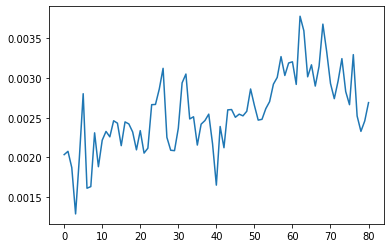

In [144]:
plt.plot(finalcorr[7])